In [1]:
import pandas as pd
import os

main_folder = '/Volumes/G Drive/enertalk/00'

# Create a dictionary to store the appliance data
appliance_data = {}

# Iterate over subfolders in the main folder
for subfolder in os.listdir(main_folder):
    if subfolder == '.DS_Store':
        continue

    subfolder_path = os.path.join(main_folder, subfolder)

    if not os.path.isdir(subfolder_path):
        continue

    try:
        # Load the washing machine data
        washing_machine_files = [file for file in os.listdir(subfolder_path) if 'washing-machine' in file and file.endswith('.parquet.gzip')]
        for file in washing_machine_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            washing_machine_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = washing_machine_data

        # Load the rice cooker data
        rice_cooker_files = [file for file in os.listdir(subfolder_path) if 'rice-cooker' in file and file.endswith('.parquet.gzip')]
        for file in rice_cooker_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            rice_cooker_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = rice_cooker_data

        # Load the total data
        total_files = [file for file in os.listdir(subfolder_path) if 'total' in file and file.endswith('.parquet.gzip')]
        for file in total_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            total_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = total_data

        # Load the TV data
        tv_files = [file for file in os.listdir(subfolder_path) if 'TV' in file and file.endswith('.parquet.gzip')]
        for file in tv_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            tv_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = tv_data

        # Load the microwave data
        microwave_files = [file for file in os.listdir(subfolder_path) if 'microwave' in file and file.endswith('.parquet.gzip')]
        for file in microwave_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            microwave_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = microwave_data

        # Load the water purifier data
        water_pur_files = [file for file in os.listdir(subfolder_path) if 'water-purifier' in file and file.endswith('.parquet.gzip')]
        for file in water_pur_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            water_pur_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = water_pur_data

        # Load the fridge data
        fridge_files = [file for file in os.listdir(subfolder_path) if 'fridge' in file and file.endswith('.parquet.gzip')]
        for file in fridge_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            fridge_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = fridge_data
            
        kimchi_fridge_files = [file for file in os.listdir(subfolder_path) if 'kimchi-fridge' in file and file.endswith('.parquet.gzip')]
        for file in kimchi_fridge_files:
            kimchi_fridge_path = os.path.join(subfolder_path, file)
            kimchi_fridge_data = pd.read_parquet(kimchi_fridge_path)
            # Store the kimchi fridge data in the dictionary with the appliance name
            appliance_name = file.split('_')[1].split('.')[0]
            appliance_data[appliance_name] = kimchi_fridge_data

    except FileNotFoundError as e:
        # Handle the case when a file is not found
        print(f"Skipping folder {subfolder}: {e}")
        continue


In [2]:
# Create a list of appliance_data and appliance_names
appliance_data = [fridge_data, microwave_data, tv_data, washing_machine_data, rice_cooker_data, water_pur_data, kimchi_fridge_data]
appliance_names = ['fridge', 'microwave', 'tv', 'washing_machine', 'rice_cooker', 'water_pur', 'kimchi_fridge']

# Iterate over the appliance_data and perform the join operation
for i, appliance in enumerate(appliance_data):
    # Rename the columns of the specific appliance dataset
    appliance.columns = [appliance_names[i] + '_active_power', appliance_names[i] + '_reactive_power', 'timestamp']
    
    # Join the total_data with the specific appliance dataset on 'timestamp' column
    appliance_data[i] = total_data.merge(appliance, on='timestamp')
    appliance_data[i].rename(columns={'active_power': 'total_active_power', 'reactive_power': 'total_reactive_power'}, inplace=True)
    appliance_data[i] = appliance_data[i].dropna()
    if i == 0:
        fridge_data = appliance_data[i]
        fridge_data = fridge_data.set_index('timestamp')
    elif i == 1:
        microwave_data = appliance_data[i]
        microwave_data = microwave_data.set_index('timestamp')
    elif i == 2:
        tv_data = appliance_data[i]
        tv_data = tv_data.set_index('timestamp')
    elif i == 3:
        washing_machine_data = appliance_data[i]
        washing_machine_data = washing_machine_data.set_index('timestamp')
    elif i == 4:
        rice_cooker_data = appliance_data[i]
        rice_cooker_data = rice_cooker_data.set_index('timestamp')
    elif i == 5:
        water_pur_data = appliance_data[i]
        water_pur_data = water_pur_data.set_index('timestamp')
    elif i == 6:
        kimchi_fridge_data = appliance_data[i]
        kimchi_fridge_data = kimchi_fridge_data.set_index('timestamp')



In [3]:
fridge_data

,total_active_power,total_reactive_power,fridge_active_power,fridge_reactive_power
timestamp,,,,
1.482885e+12,490.08,-165.51,0.52,-3.34
1.482885e+12,489.32,-165.41,0.67,-3.35
1.482885e+12,493.96,-166.04,0.62,-3.30
1.482885e+12,491.11,-165.96,0.59,-3.37
1.482885e+12,490.94,-166.14,0.63,-3.43
...,...,...,...,...
1.482967e+12,747.78,-89.63,0.69,-3.53
1.482967e+12,779.32,-95.42,0.52,-3.52
1.482967e+12,799.57,-97.13,0.53,-3.47


In [3]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score



# Define the list of target columns for each appliance
target_columns = [
    ['fridge_active_power', 'fridge_reactive_power'],
    ['microwave_active_power', 'microwave_reactive_power'],
    ['tv_active_power', 'tv_reactive_power'],
    ['washing_machine_active_power', 'washing_machine_reactive_power'],
    ['rice_cooker_active_power', 'rice_cooker_reactive_power'],
    ['water_pur_active_power', 'water_pur_reactive_power'],
    ['kimchi_fridge_active_power', 'kimchi_fridge_reactive_power']
]

train_data = []
test_data = []

# Split each dataset into train and test sets
for dataset in appliance_data:
    dataset_test_size = int(0.2 * len(dataset))
    dataset_test_indx = len(dataset) - dataset_test_size
    dataset_test = dataset.iloc[dataset_test_indx:].set_index('timestamp')
    dataset_train = dataset.iloc[:dataset_test_indx].set_index('timestamp')
    
    train_data.append(dataset_train)
    test_data.append(dataset_test)

fridge_train, microwave_train, tv_train, washing_machine_train, rice_cooker_train, water_pur_train, kimchi_fridge_train = train_data
fridge_test, microwave_test, tv_test, washing_machine_test, rice_cooker_test, water_pur_test, kimchi_fridge_test = test_data


In [5]:
fridge_train

,total_active_power,total_reactive_power,fridge_active_power,fridge_reactive_power
timestamp,,,,
1.482885e+12,490.08,-165.51,0.52,-3.34
1.482885e+12,489.32,-165.41,0.67,-3.35
1.482885e+12,493.96,-166.04,0.62,-3.30
1.482885e+12,491.11,-165.96,0.59,-3.37
1.482885e+12,490.94,-166.14,0.63,-3.43
...,...,...,...,...
1.482957e+12,308.60,-44.66,0.60,-3.41
1.482957e+12,309.23,-44.09,0.55,-3.57
1.482957e+12,309.66,-44.47,0.62,-3.40


In [6]:
fridge_test

,total_active_power,total_reactive_power,fridge_active_power,fridge_reactive_power
timestamp,,,,
1.482957e+12,315.99,-43.50,0.60,-3.48
1.482957e+12,315.30,-43.23,0.62,-3.38
1.482957e+12,315.67,-43.07,0.56,-3.35
1.482957e+12,311.25,-44.57,0.55,-3.39
1.482957e+12,310.85,-44.82,0.52,-3.44
...,...,...,...,...
1.482967e+12,747.78,-89.63,0.69,-3.53
1.482967e+12,779.32,-95.42,0.52,-3.52
1.482967e+12,799.57,-97.13,0.53,-3.47


In [4]:
# since appliance train datasets are big datasets, we are going to sample on out train datasets 

sample_size = 5000 # about 10% of the original fridge train set 


# Randomly sample the training data
fridge_train_sample = fridge_train.sample(n=sample_size, random_state=64)
microwave_train_sample = microwave_train.sample(n=sample_size, random_state = 71)
tv_train_sample = tv_train.sample(n=sample_size, random_state = 97)
washing_machine_train_sample = washing_machine_train.sample(n=sample_size, random_state=44)
rice_cooker_train_sample = rice_cooker_train.sample(n=sample_size, random_state=34)
water_pur_train_sample = water_pur_train.sample(n=sample_size, random_state=60)
kimchi_fridge_train_sample = kimchi_fridge_train.sample(n=sample_size, random_state=31)

scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
scaler3 = MinMaxScaler()
scaler4 = MinMaxScaler()
scaler5 = MinMaxScaler()
scaler6 = MinMaxScaler()
scaler7 = MinMaxScaler()
fridge_train_sample
fridge_scaled_train = scaler1.fit_transform(fridge_train_sample)
microwave_scaled_train = scaler2.fit_transform(microwave_train_sample)
tv_scaled_train = scaler3.fit_transform(tv_train_sample)
washing_machine_scaled_train = scaler4.fit_transform(washing_machine_train_sample)
rice_cooker_scaled_train = scaler5.fit_transform(rice_cooker_train_sample)
water_pur_scaled_train = scaler6.fit_transform(water_pur_train_sample)
kimchi_fridge_scaled_train = scaler7.fit_transform(kimchi_fridge_train_sample)
##
fridge_scaled_test = scaler1.transform(fridge_test)
microwave_scaled_test = scaler2.transform(microwave_test)
tv_scaled_test = scaler3.transform(tv_test)
washing_machine_scaled_test = scaler4.transform(washing_machine_test)
rice_cooker_scaled_test = scaler5.transform(rice_cooker_test)
water_pur_scaled_test = scaler6.transform(water_pur_test)
kimchi_fridge_scaled_test = scaler7.transform(kimchi_fridge_test)




In [14]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM , Dense , GRU, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
import os
    # Convert target columns to a numpy array
total_features = ['total_active_power', 'total_reactive_power']
fridge_features = target_columns[0]
microwave_features = target_columns[1]
tv_features = target_columns[2]
washing_machine_features = target_columns[3]
rice_cooker_features = target_columns[4]
water_pur_features = target_columns[5]
kimchi_fridge_features = target_columns[6]

length = 10
batch_size = 1

train_generator_fridge = TimeseriesGenerator(fridge_scaled_train[:, :2], fridge_scaled_train[:, -2:], length=length, batch_size=batch_size)
validation_generator_fridge = TimeseriesGenerator(fridge_scaled_test[:, :2], fridge_scaled_test[:, -2:], length=length, batch_size=batch_size)


# Build the RNN model
model_fridge = Sequential()
model_fridge.add(LSTM(32, activation='relu', input_shape=(length, len(total_features)), return_sequences=True))
model_fridge.add(LSTM(16, return_sequences=True))
model_fridge.add(Dropout(0.5))
model_fridge.add(LSTM(4))
model_fridge.add(Dropout(0.5))
model_fridge.add(Dense(len(fridge_features)))

model_fridge.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'accuracy'])
model_fridge.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history_fridge = model_fridge.fit(train_generator_fridge, epochs=7, validation_data=validation_generator_fridge, callbacks=[early_stop])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 10, 32)            4480      
                                                                 
 lstm_14 (LSTM)              (None, 10, 16)            3136      
                                                                 
 dropout_8 (Dropout)         (None, 10, 16)            0         
                                                                 
 lstm_15 (LSTM)              (None, 4)                 336       
                                                                 
 dropout_9 (Dropout)         (None, 4)                 0         
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
Total params: 7,962
Trainable params: 7,962
Non-traina

2023-06-07 15:38:35.884491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-07 15:38:36.206996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-07 15:38:36.287530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-07 15:38:36.403235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


   1/4990 [..............................] - ETA: 3:03:05 - loss: 0.0103 - mse: 0.0103 - mae: 0.1001 - accuracy: 1.0000

2023-06-07 15:38:36.512886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4990/4990 [==============================] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0166 - accuracy: 0.1968

2023-06-07 15:48:05.391393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-07 15:48:05.511424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-07 15:48:05.578151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4990/4990 [==============================] - 823s 165ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0166 - accuracy: 0.1968 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0187 - val_accuracy: 0.3512
Epoch 2/7
4990/4990 [==============================] - 832s 167ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0166 - accuracy: 0.1563 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0148 - val_accuracy: 0.3091
Epoch 3/7
4990/4990 [==============================] - 841s 169ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0166 - accuracy: 0.1471 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0272 - val_accuracy: 0.3091
Epoch 4/7
4990/4990 [==============================] - 848s 170ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0167 - accuracy: 0.1361 - val_loss: 0.0025 - val_mse: 0.0025 - val_mae: 0.0388 - val_accuracy: 0.3761
Epoch 5/7
4990/4990 [==============================] - 855s 171ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0166 - accuracy: 0.1361 - val_loss: 0.0037 - val_mse: 0.0

In [50]:
n_features_f = len(total_features)  # Number of aggregated features

test_predictions_f = []


first_eval_batch_f = fridge_scaled_train[-length:, :2]   # Select the total features

first_eval_batch_f = first_eval_batch_f.reshape((1, length, n_features_f))

current_batch_f = first_eval_batch_f

for i in range(len(fridge_test)):        #
    # Get prediction 1 time step ahead ([0] is for grabbing just the number instead of [array])
    current_pred_f = model_fridge.predict(current_batch_f)[0]

    # Inverse transform the predicted values

    # Store the actual prediction
    test_predictions_f.append(current_pred_f)

    # Update the batch to include the prediction and drop the first value
    current_batch_f = np.append(current_batch_f[:, 1:, :], [[current_pred_f]], axis=1)

1/1 [==============================] - 0s 28ms/step


In [51]:
test_predictions_f = pd.DataFrame(test_predictions_f)
test_predictions_f = test_predictions_f.rename(columns={0: 'fridge_active_power', 1: 'fridge_reactive_power'})
test_predictions_f


,fridge_active_power,fridge_reactive_power
0,0.044121,0.056185
1,0.043856,0.056084
2,0.042568,0.057187
3,0.042794,0.056210
4,0.042932,0.055478
...,...,...
13051,0.049367,0.047172
13052,0.049367,0.047172
13053,0.049367,0.047172
13054,0.049367,0.047172


In [52]:
filler_df = pd.DataFrame(0, index=range(13056), columns=range(2))

In [53]:
preds_f = pd.concat([test_predictions_f, filler_df], axis=1)
preds_f

,fridge_active_power,fridge_reactive_power,0,1
0,0.044121,0.056185,0,0
1,0.043856,0.056084,0,0
2,0.042568,0.057187,0,0
3,0.042794,0.056210,0,0
4,0.042932,0.055478,0,0
...,...,...,...,...
13051,0.049367,0.047172,0,0
13052,0.049367,0.047172,0,0
13053,0.049367,0.047172,0,0
13054,0.049367,0.047172,0,0


In [54]:
inverse_transformed_data = scaler1.inverse_transform(preds_f)
true_predictions_fridge = pd.DataFrame(inverse_transformed_data)
true_predictions_fridge 

,0,1,2,3
0,146.503627,-190.601015,0.34,-3.71
1,146.088424,-190.675402,0.34,-3.71
2,144.071549,-189.861774,0.34,-3.71
3,144.424950,-190.582611,0.34,-3.71
4,144.641652,-191.122812,0.34,-3.71
...,...,...,...,...
13051,154.718616,-197.252139,0.34,-3.71
13052,154.718616,-197.252139,0.34,-3.71
13053,154.718616,-197.252139,0.34,-3.71
13054,154.718616,-197.252139,0.34,-3.71


In [55]:
true_predictions_fridge = true_predictions_fridge.iloc[:, :2]
true_predictions_fridge = true_predictions_fridge.rename(columns={0: 'fridge_active_power', 1: 'fridge_reactive_power'})
true_predictions_fridge

,fridge_active_power,fridge_reactive_power
0,146.503627,-190.601015
1,146.088424,-190.675402
2,144.071549,-189.861774
3,144.424950,-190.582611
4,144.641652,-191.122812
...,...,...
13051,154.718616,-197.252139
13052,154.718616,-197.252139
13053,154.718616,-197.252139
13054,154.718616,-197.252139


In [56]:
fridge_test.iloc[:, -2:]

,fridge_active_power,fridge_reactive_power
timestamp,,
1.482957e+12,0.60,-3.48
1.482957e+12,0.62,-3.38
1.482957e+12,0.56,-3.35
1.482957e+12,0.55,-3.39
1.482957e+12,0.52,-3.44
...,...,...
1.482967e+12,0.69,-3.53
1.482967e+12,0.52,-3.52
1.482967e+12,0.53,-3.47


In [58]:
metrics_fridge = pd.DataFrame(history_fridge.history)
metrics_fridge
losses_fridge = metrics_fridge[['loss','val_loss']]
mae_fridge = metrics_fridge[['mae','val_mae']]
accuracy_fridge = metrics_fridge[['accuracy' , 'val_accuracy']]

<AxesSubplot: >

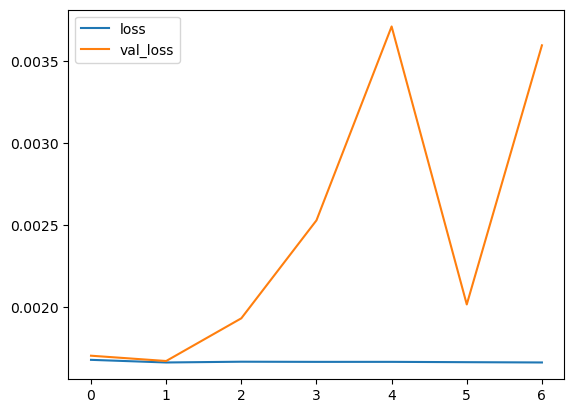

In [59]:
losses_fridge.plot() # we can see that 6 epochs did not do anything and even from epoch one we could have even better results

<AxesSubplot: >

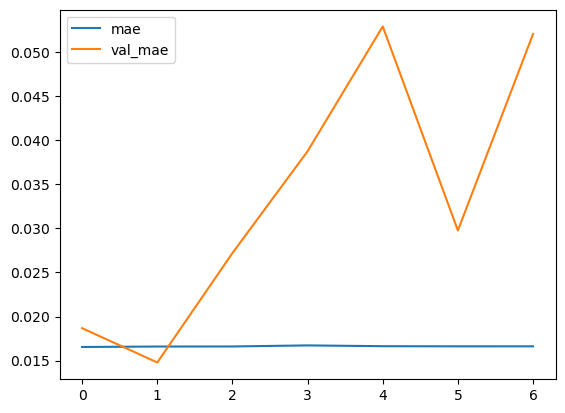

In [60]:
mae_fridge.plot()

<AxesSubplot: >

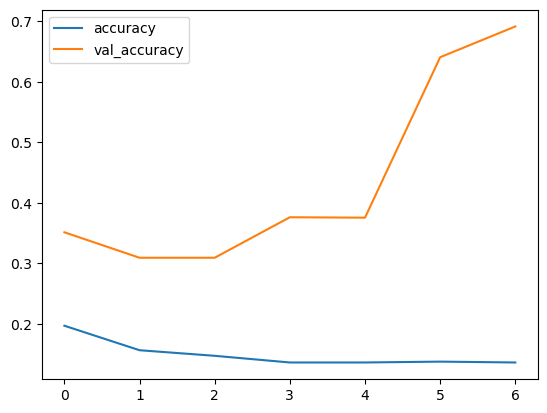

In [61]:
accuracy_fridge.plot() # accuracy is basically irrelevant since we are implementing reggreassion models

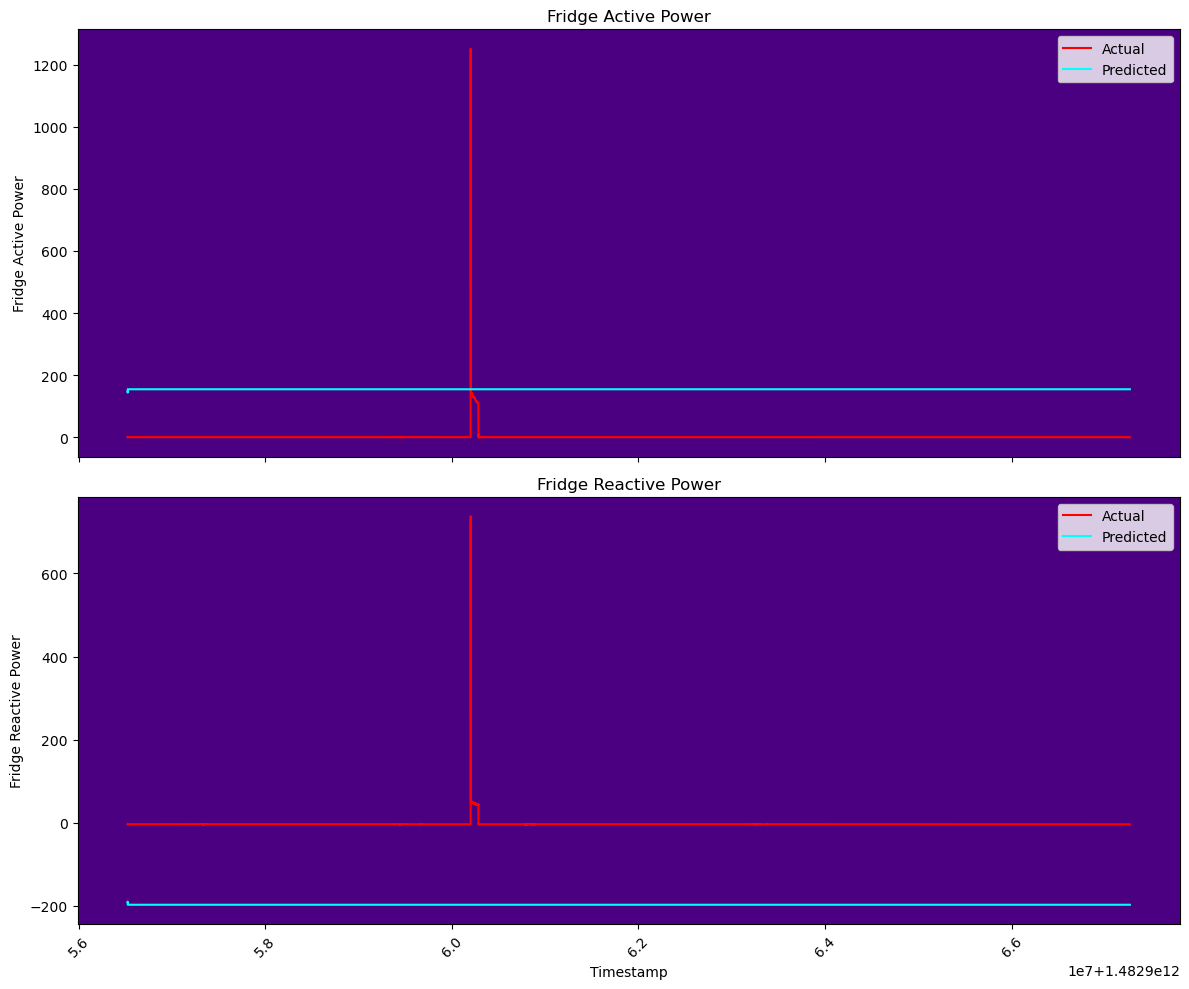

In [75]:
import matplotlib.pyplot as plt

# Extract the timestamp column from fridge_test
timestamps = fridge_test.index

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot fridge_active_power
axs[0].plot(timestamps, fridge_test['fridge_active_power'], label='Actual', color='red')
axs[0].plot(timestamps, true_predictions_fridge['fridge_active_power'], label='Predicted', color='cyan')
axs[0].set_ylabel('Fridge Active Power')
axs[0].set_title('Fridge Active Power')

# Plot fridge_reactive_power
axs[1].plot(timestamps, fridge_test['fridge_reactive_power'], label='Actual', color='red')
axs[1].plot(timestamps, true_predictions_fridge['fridge_reactive_power'], label='Predicted', color='cyan')
axs[1].set_ylabel('Fridge Reactive Power')
axs[1].set_title('Fridge Reactive Power')

# Set indigo background color for both plots
axs[0].set_facecolor('indigo')
axs[1].set_facecolor('indigo')

# Set x-axis label
axs[1].set_xlabel('Timestamp')

# Display legends
axs[0].legend()
axs[1].legend()

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Adjust subplots layout
plt.tight_layout()

# Display the plot
plt.show()


In [6]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM , Dense , GRU, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
import os
    # Convert target columns to a numpy array
total_features = ['total_active_power', 'total_reactive_power']
fridge_features = target_columns[0]
microwave_features = target_columns[1]
tv_features = target_columns[2]
washing_machine_features = target_columns[3]
rice_cooker_features = target_columns[4]
water_pur_features = target_columns[5]
kimchi_fridge_features = target_columns[6]

length = 5
batch_size = 1

train_generator_washing_machine = TimeseriesGenerator(washing_machine_scaled_train[:, :2], washing_machine_scaled_train[:, -2:], length=length, batch_size=batch_size)
validation_generator_washing_machine = TimeseriesGenerator(washing_machine_scaled_test[:, :2], washing_machine_scaled_test[:, -2:], length=length, batch_size=batch_size)


# Build the RNN model
model_washing_machine = Sequential()
model_washing_machine.add(LSTM(32, activation='relu', input_shape=(length, len(total_features)), return_sequences=True))
model_washing_machine.add(LSTM(16, return_sequences=True))
model_washing_machine.add(Dropout(0.5))
model_washing_machine.add(LSTM(4))
model_washing_machine.add(Dropout(0.5))
model_washing_machine.add(Dense(len(washing_machine_features)))

model_washing_machine.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'accuracy'])
model_washing_machine.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history_washing_machine = model_washing_machine.fit(train_generator_washing_machine, epochs=7, validation_data=validation_generator_washing_machine, callbacks=[early_stop])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 5, 32)             4480      
                                                                 
 lstm_4 (LSTM)               (None, 5, 16)             3136      
                                                                 
 dropout_2 (Dropout)         (None, 5, 16)             0         
                                                                 
 lstm_5 (LSTM)               (None, 4)                 336       
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
Total params: 7,962
Trainable params: 7,962
Non-traina

2023-06-07 20:39:18.686187: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-07 20:39:20.289875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-07 20:39:20.802519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-07 20:39:21.339603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-07 20:39:21.544950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-07 20:39:21.876292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4995/4995 [==============================] - ETA: 0s - loss: 0.0283 - mse: 0.0283 - mae: 0.1294 - accuracy: 0.9465

2023-06-07 20:46:19.515985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-07 20:46:19.706567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-07 20:46:19.775470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4995/4995 [==============================] - 635s 127ms/step - loss: 0.0283 - mse: 0.0283 - mae: 0.1294 - accuracy: 0.9465 - val_loss: 6132485.5000 - val_mse: 6132485.5000 - val_mae: 760.3935 - val_accuracy: 0.7273
Epoch 2/7
4995/4995 [==============================] - 625s 125ms/step - loss: 0.0269 - mse: 0.0269 - mae: 0.1262 - accuracy: 0.9465 - val_loss: 6132483.5000 - val_mse: 6132483.5000 - val_mae: 760.3887 - val_accuracy: 0.7273
Epoch 3/7
4995/4995 [==============================] - 671s 134ms/step - loss: 0.0267 - mse: 0.0267 - mae: 0.1257 - accuracy: 0.9465 - val_loss: 6132563.5000 - val_mse: 6132563.5000 - val_mae: 760.3992 - val_accuracy: 0.7273
Epoch 4/7
4995/4995 [==============================] - 738s 148ms/step - loss: 0.0267 - mse: 0.0267 - mae: 0.1256 - accuracy: 0.9465 - val_loss: 6132598.0000 - val_mse: 6132598.0000 - val_mae: 760.4111 - val_accuracy: 0.7273
Epoch 5/7
4995/4995 [==============================] - 768s 154ms/step - loss: 0.0267 - mse: 0.0267 - mae: 0.1

In [8]:
# because there are going to be test size lines followed, we will supress the output of this cell
# we don't want 13 thousand + or - lines showing
import os
import sys

# Save the current standard output
original_stdout = sys.stdout

# Redirect standard output to null device
sys.stdout = open(os.devnull, 'w')

# Your existing code

# Restore the original standard output
sys.stdout = original_stdout


n_features_wm = len(total_features)  # Number of aggregated features

test_predictions_wm = []


first_eval_batch_wm = washing_machine_scaled_train[-length:, :2]   # Select the total features

first_eval_batch_wm = first_eval_batch_wm.reshape((1, length, n_features_wm))

current_batch_wm = first_eval_batch_wm

for i in range(len(washing_machine_test)):        #
    # Get prediction 1 time step ahead ([0] is for grabbing just the number instead of [array])
    current_pred_wm = model_washing_machine.predict(current_batch_wm)[0]

    # Inverse transform the predicted values

    # Store the actual prediction
    test_predictions_wm.append(current_pred_wm)

    # Update the batch to include the prediction and drop the first value
    current_batch_wm = np.append(current_batch_wm[:, 1:, :], [[current_pred_wm]], axis=1)

2023-06-07 22:06:26.125701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-07 22:06:26.314134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 28ms/step


2023-06-07 22:06:26.412499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 39ms/step


In [9]:
washing_machine_test

,total_active_power,total_reactive_power,washing_machine_active_power,washing_machine_reactive_power
timestamp,,,,
1.482941e+12,264.38,-160.78,0.11,5.90
1.482941e+12,264.51,-160.78,0.06,5.96
1.482941e+12,264.68,-161.21,0.02,5.91
1.482941e+12,263.82,-160.95,0.10,5.97
1.482941e+12,264.21,-161.32,0.08,6.00
...,...,...,...,...
1.482969e+12,536.04,-143.31,0.08,6.15
1.482969e+12,535.65,-143.25,0.04,6.18
1.482969e+12,536.15,-143.22,0.05,6.15


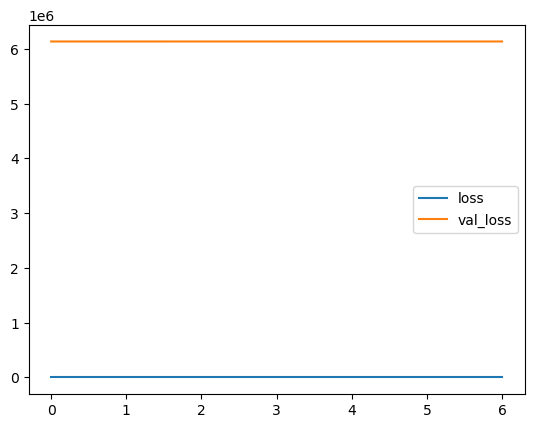

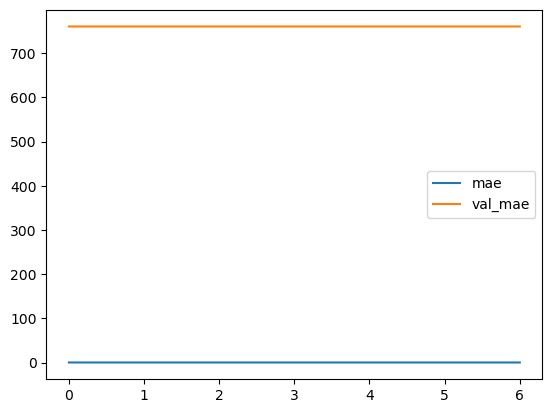

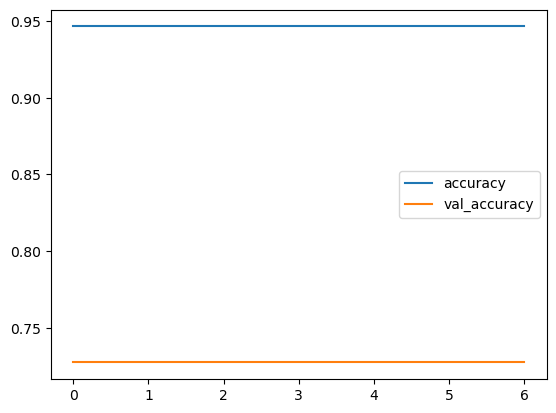

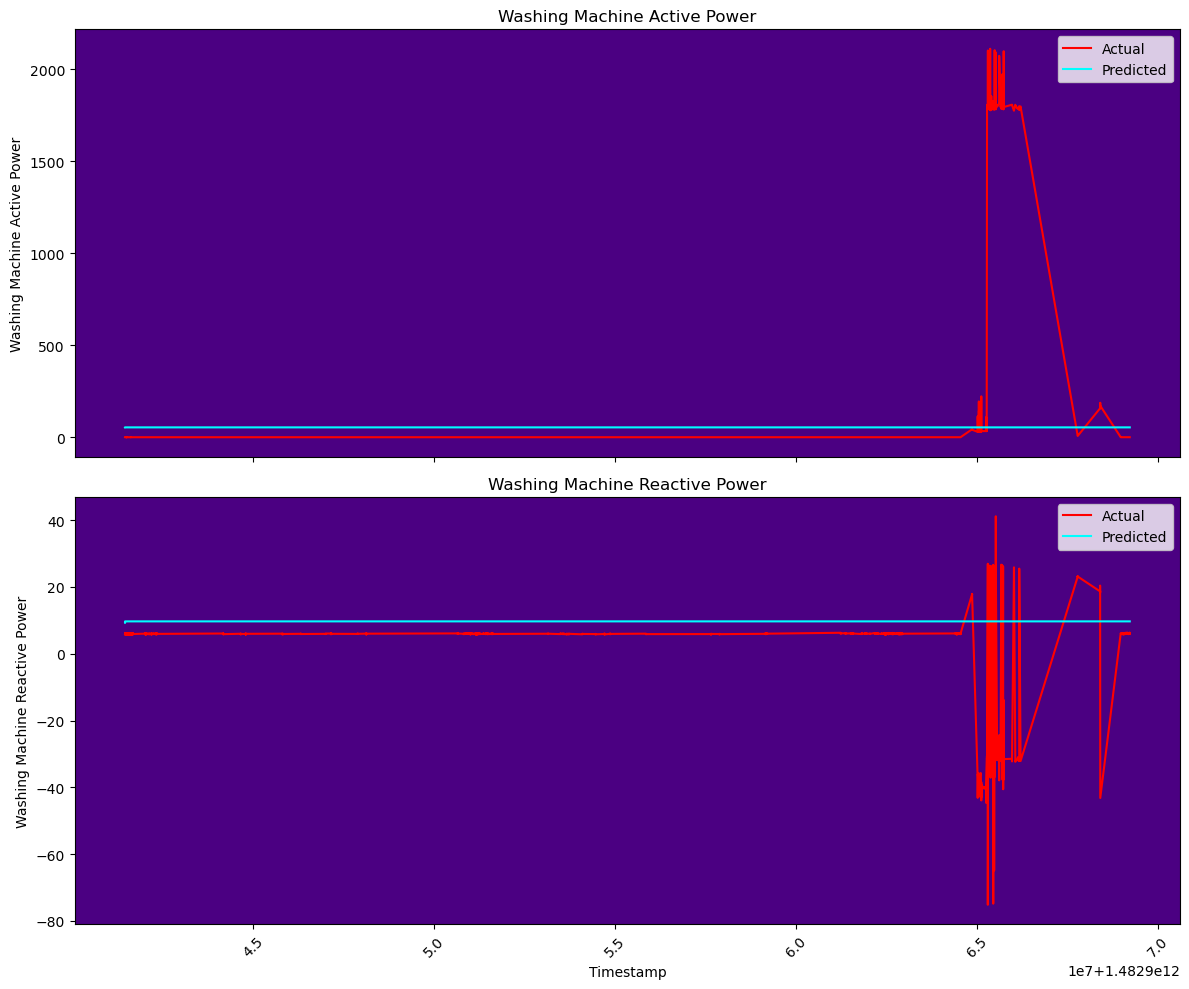

In [15]:
# we have 12346 rows filler df to inverse transform the data will be 12346 rows × 2 columns
test_predictions_wm = pd.DataFrame(test_predictions_wm)
test_predictions_wm = test_predictions_wm.rename(columns={0: 'washing_machine_active_power', 1: 'washing_machine_reactive_power'})
test_predictions_wm
filler_df = pd.DataFrame(0, index=range(12346), columns=range(2))
preds_wm = pd.concat([test_predictions_wm, filler_df], axis=1)
preds_wm
inverse_transformed_data = scaler2.inverse_transform(preds_wm)
true_predictions_washing_machine = pd.DataFrame(inverse_transformed_data)
 
true_predictions_washing_machine = true_predictions_washing_machine.iloc[:, :2]
true_predictions_washing_machine = true_predictions_washing_machine.rename(columns={0: 'washing_machine_active_power', 1: 'washing_machine_reactive_power'})

washing_machine_test = washing_machine_test.iloc[:, -2:]
metrics_washing_machine = pd.DataFrame(history_washing_machine.history)
metrics_washing_machine
losses_washing_machine = metrics_washing_machine[['loss','val_loss']]
mae_washing_machine = metrics_washing_machine[['mae','val_mae']]
accuracy_washing_machine = metrics_washing_machine[['accuracy' , 'val_accuracy']]
losses_washing_machine.plot() # we can see that 6 epochs did not do anything and even from epoch one we could have even better results
mae_washing_machine.plot()
accuracy_washing_machine.plot() # accuracy is basically irrelevant since we are implementing reggreassion models
import matplotlib.pyplot as plt

# Extract the timestamp column from fridge_test
timestamps = washing_machine_test.index

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot fridge_active_power
axs[0].plot(timestamps, washing_machine_test['washing_machine_active_power'], label='Actual', color='red')
axs[0].plot(timestamps, true_predictions_washing_machine['washing_machine_active_power'], label='Predicted', color='cyan')
axs[0].set_ylabel('Washing Machine Active Power')
axs[0].set_title('Washing Machine Active Power')

# Plot fridge_reactive_power
axs[1].plot(timestamps, washing_machine_test['washing_machine_reactive_power'], label='Actual', color='red')
axs[1].plot(timestamps, true_predictions_washing_machine['washing_machine_reactive_power'], label='Predicted', color='cyan')
axs[1].set_ylabel('Washing Machine Reactive Power')
axs[1].set_title('Washing Machine Reactive Power')

# Set indigo background color for both plots
axs[0].set_facecolor('indigo')
axs[1].set_facecolor('indigo')

# Set x-axis label
axs[1].set_xlabel('Timestamp')

# Display legends
axs[0].legend()
axs[1].legend()

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Adjust subplots layout
plt.tight_layout()

# Display the plot
plt.show()


In [7]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM , Dense , GRU, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
import os
    # Convert target columns to a numpy array
total_features = ['total_active_power', 'total_reactive_power']
fridge_features = target_columns[0]
microwave_features = target_columns[1]
tv_features = target_columns[2]
washing_machine_features = target_columns[3]
rice_cooker_features = target_columns[4]
water_pur_features = target_columns[5]
kimchi_fridge_features = target_columns[6]


Metal device set to: Apple M1


2023-06-08 14:06:17.958578: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-08 14:06:17.959272: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 32)             4480      
                                                                 
 lstm_1 (LSTM)               (None, 5, 16)             3136      
                                                                 
 dropout (Dropout)           (None, 5, 16)             0         
                                                                 
 lstm_2 (LSTM)               (None, 4)                 336       
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 2)                 10        
                                                                 
Total params: 7,962
Trainable params: 7,962
Non-trainabl

2023-06-08 14:06:18.662681: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-08 14:06:20.287313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-08 14:06:20.832623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-08 14:06:20.965411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-08 14:06:21.159687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-08 14:06:21.338373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4995/4995 [==============================] - ETA: 0s - loss: 0.1931 - mse: 0.1931 - mae: 0.4331 - accuracy: 0.9548

2023-06-08 14:13:18.019579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-08 14:13:18.170257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-08 14:13:18.230057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4995/4995 [==============================] - 576s 115ms/step - loss: 0.1931 - mse: 0.1931 - mae: 0.4331 - accuracy: 0.9548 - val_loss: 0.0467 - val_mse: 0.0467 - val_mae: 0.2155 - val_accuracy: 0.9999
Epoch 2/5
4995/4995 [==============================] - 537s 107ms/step - loss: 0.1911 - mse: 0.1911 - mae: 0.4331 - accuracy: 0.9778 - val_loss: 0.0585 - val_mse: 0.0585 - val_mae: 0.2409 - val_accuracy: 0.9999
Epoch 3/5
4995/4995 [==============================] - 1218s 244ms/step - loss: 0.1908 - mse: 0.1908 - mae: 0.4329 - accuracy: 0.9778 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.2276 - val_accuracy: 0.9999
Epoch 4/5
4995/4995 [==============================] - 538s 108ms/step - loss: 0.1907 - mse: 0.1907 - mae: 0.4326 - accuracy: 0.9778 - val_loss: 0.0621 - val_mse: 0.0621 - val_mae: 0.2474 - val_accuracy: 0.9999


2023-06-08 14:54:08.720433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-08 14:54:08.860914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s

2023-06-08 14:54:08.923086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 27ms/step


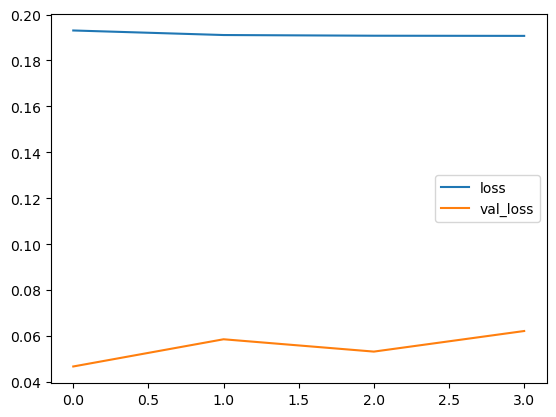

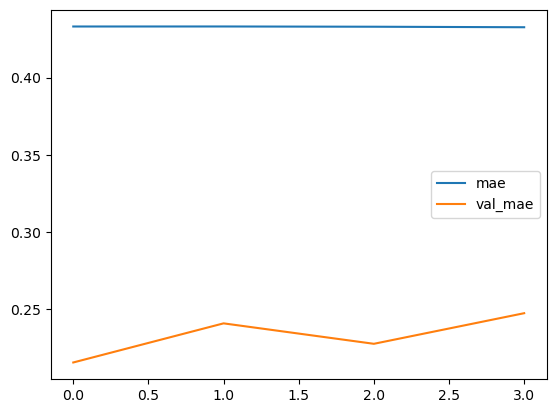

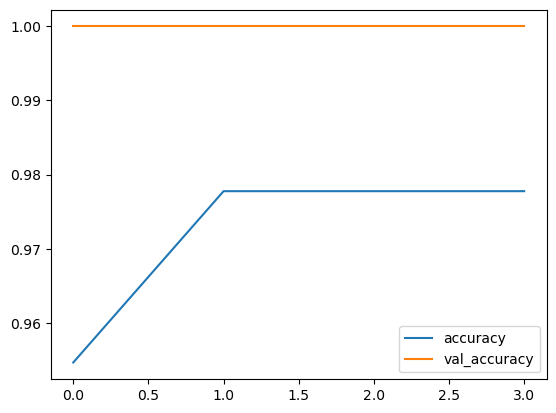

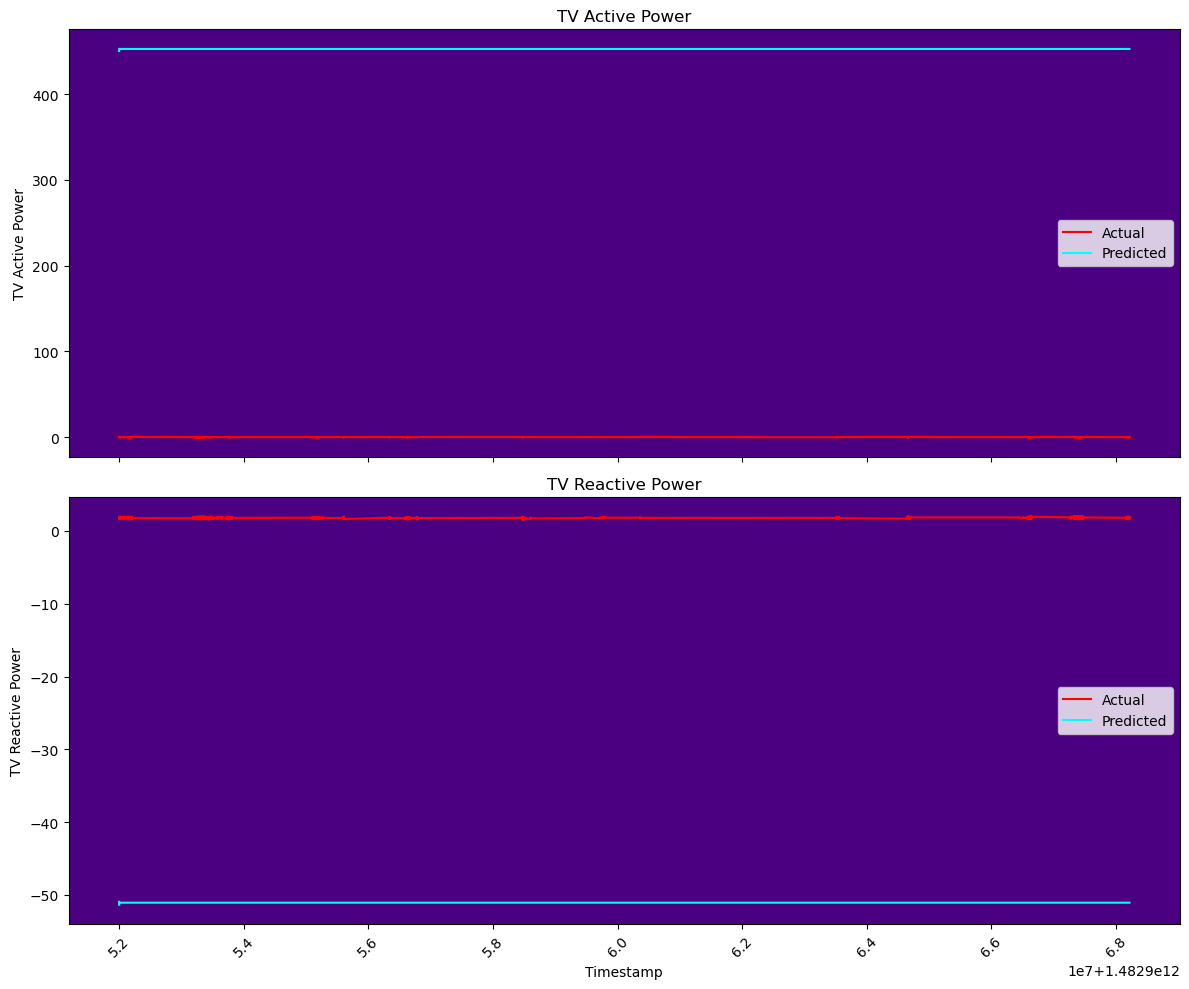

In [8]:
# the model as we see did not catch any pattern and in 7 epochs time the metrics remained stable during training
# so we will implement less epochs for the remaining datasets

length = 5
batch_size = 1

train_generator_tv = TimeseriesGenerator(tv_scaled_train[:, :2], tv_scaled_train[:, -2:], length=length, batch_size=batch_size)
validation_generator_tv = TimeseriesGenerator(tv_scaled_test[:, :2], tv_scaled_test[:, -2:], length=length, batch_size=batch_size)


# Build the RNN model
model_tv = Sequential()
model_tv.add(LSTM(32, activation='relu', input_shape=(length, len(total_features)), return_sequences=True))
model_tv.add(LSTM(16, return_sequences=True))
model_tv.add(Dropout(0.5))
model_tv.add(LSTM(4))
model_tv.add(Dropout(0.5))
model_tv.add(Dense(len(tv_features)))

model_tv.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'accuracy'])
model_tv.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history_tv = model_tv.fit(train_generator_tv, epochs=5, validation_data=validation_generator_tv, callbacks=[early_stop])

##############################################################################################

n_features_tv = len(total_features)  # Number of aggregated features

test_predictions_tv = []


first_eval_batch_tv = tv_scaled_train[-length:, :2]   # Select the total features

first_eval_batch_tv = first_eval_batch_tv.reshape((1, length, n_features_tv))

current_batch_tv = first_eval_batch_tv

for i in range(len(tv_test)):        #
    # Get prediction 1 time step ahead ([0] is for grabbing just the number instead of [array])
    current_pred_tv = model_tv.predict(current_batch_tv)[0]

    # Inverse transform the predicted values

    # Store the actual prediction
    test_predictions_tv.append(current_pred_tv)

    # Update the batch to include the prediction and drop the first value
    current_batch_tv = np.append(current_batch_tv[:, 1:, :], [[current_pred_tv]], axis=1)
    
#################################################################################################

    
    
# we have 12346 rows filler df to inverse transform the data will be 12346 rows × 2 columns
test_predictions_tv = pd.DataFrame(test_predictions_tv)
test_predictions_tv = test_predictions_tv.rename(columns={0: 'tv_active_power', 1: 'tv_reactive_power'})
test_predictions_tv
filler_df = pd.DataFrame(0, index=range(len(tv_test)), columns=range(2))
preds_tv = pd.concat([test_predictions_tv, filler_df], axis=1)
preds_tv
inverse_transformed_data = scaler2.inverse_transform(preds_tv)
true_predictions_tv = pd.DataFrame(inverse_transformed_data)
 
true_predictions_tv = true_predictions_tv.iloc[:, :2]
true_predictions_tv = true_predictions_tv.rename(columns={0: 'tv_active_power', 1: 'tv_reactive_power'})

tv_test = tv_test.iloc[:, -2:]
metrics_tv = pd.DataFrame(history_tv.history)
metrics_tv
losses_tv = metrics_tv[['loss','val_loss']]
mae_tv = metrics_tv[['mae','val_mae']]
accuracy_tv = metrics_tv[['accuracy' , 'val_accuracy']]
losses_tv.plot() # we can see that 6 epochs did not do anything and even from epoch one we could have even better results
mae_tv.plot()
accuracy_tv.plot() # accuracy is basically irrelevant since we are implementing reggreassion models
import matplotlib.pyplot as plt

# Extract the timestamp column from tv_test
timestamps = tv_test.index

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot tv_active_power
axs[0].plot(timestamps, tv_test['tv_active_power'], label='Actual', color='red')
axs[0].plot(timestamps, true_predictions_tv['tv_active_power'], label='Predicted', color='cyan')
axs[0].set_ylabel('TV Active Power')
axs[0].set_title('TV Active Power')

# Plot tv_reactive_power
axs[1].plot(timestamps, tv_test['tv_reactive_power'], label='Actual', color='red')
axs[1].plot(timestamps, true_predictions_tv['tv_reactive_power'], label='Predicted', color='cyan')
axs[1].set_ylabel('TV Reactive Power')
axs[1].set_title('TV Reactive Power')

# Set indigo background color for both plots
axs[0].set_facecolor('indigo')
axs[1].set_facecolor('indigo')

# Set x-axis label
axs[1].set_xlabel('Timestamp')

# Display legends
axs[0].legend()
axs[1].legend()

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Adjust subplots layout
plt.tight_layout()

# Display the plot
plt.show()



In [6]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM , Dense , GRU, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
import os
    # Convert target columns to a numpy array
total_features = ['total_active_power', 'total_reactive_power']
fridge_features = target_columns[0]
microwave_features = target_columns[1]
tv_features = target_columns[2]
washing_machine_features = target_columns[3]
rice_cooker_features = target_columns[4]
water_pur_features = target_columns[5]
kimchi_fridge_features = target_columns[6]


In [ ]:
# the model as we see did not catch any pattern and in 7 epochs time the metrics remained stable during training
# so we will implement less epochs for the remaining datasets

length = 8
batch_size = 1

train_generator_microwave = TimeseriesGenerator(microwave_scaled_train[:, :2], microwave_scaled_train[:, -2:], length=length, batch_size=batch_size)
validation_generator_microwave = TimeseriesGenerator(microwave_scaled_test[:, :2], microwave_scaled_test[:, -2:], length=length, batch_size=batch_size)


# Build the RNN model
model_microwave = Sequential()
model_microwave.add(LSTM(32, activation='relu', input_shape=(length, len(total_features)), return_sequences=True))
model_microwave.add(LSTM(16, return_sequences=True))
model_microwave.add(Dropout(0.5))
model_microwave.add(LSTM(4))
model_microwave.add(Dropout(0.5))
model_microwave.add(Dense(len(microwave_features)))

model_microwave.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'accuracy'])
model_microwave.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history_microwave = model_microwave.fit(train_generator_microwave, epochs=5, validation_data=validation_generator_microwave, callbacks=[early_stop])

##############################################################################################

n_features_microwave = len(total_features)  # Number of aggregated features

test_predictions_microwave = []


first_eval_batch_microwave = microwave_scaled_train[-length:, :2]   # Select the total features

first_eval_batch_microwave = first_eval_batch_microwave.reshape((1, length, n_features_microwave))

current_batch_microwave = first_eval_batch_microwave

for i in range(len(microwave_test)):        #
    # Get prediction 1 time step ahead ([0] is for grabbing just the number instead of [array])
    current_pred_microwave = model_microwave.predict(current_batch_microwave)[0]

    # Inverse transform the predicted values

    # Store the actual prediction
    test_predictions_microwave.append(current_pred_microwave)

    # Update the batch to include the prediction and drop the first value
    current_batch_microwave = np.append(current_batch_microwave[:, 1:, :], [[current_pred_microwave]], axis=1)
    
#################################################################################################

    
    
# we have 12346 rows filler df to inverse transform the data will be 12346 rows × 2 columns
test_predictions_microwave = pd.DataFrame(test_predictions_microwave)
test_predictions_microwave = test_predictions_microwave.rename(columns={0: 'microwave_active_power', 1: 'microwave_reactive_power'})
test_predictions_microwave
filler_df = pd.DataFrame(0, index=range(len(microwave_test)), columns=range(2))
preds_microwave = pd.concat([test_predictions_microwave, filler_df], axis=1)
preds_microwave
inverse_transformed_data = scaler2.inverse_transform(preds_microwave)
true_predictions_microwave = pd.DataFrame(inverse_transformed_data)
 
true_predictions_microwave = true_predictions_microwave.iloc[:, :2]
true_predictions_microwave = true_predictions_microwave.rename(columns={0: 'microwave_active_power', 1: 'microwave_reactive_power'})

microwave_test = microwave_test.iloc[:, -2:]
metrics_microwave = pd.DataFrame(history_microwave.history)
metrics_microwave
losses_microwave = metrics_microwave[['loss','val_loss']]
mae_microwave = metrics_microwave[['mae','val_mae']]
accuracy_microwave = metrics_microwave[['accuracy' , 'val_accuracy']]
losses_microwave.plot() # we can see that 6 epochs did not do anything and even from epoch one we could have even better results
mae_microwave.plot()
accuracy_microwave.plot() # accuracy is basically irrelevant since we are implementing reggreassion models
import matplotlib.pyplot as plt

# Extract the timestamp column from microwave_test
timestamps = microwave_test.index

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot microwave_active_power
axs[0].plot(timestamps, microwave_test['microwave_active_power'], label='Actual', color='red')
axs[0].plot(timestamps, true_predictions_microwave['microwave_active_power'], label='Predicted', color='cyan')
axs[0].set_ylabel('Microwave Active Power')
axs[0].set_title('Microwave Active Power')

# Plot microwave_reactive_power
axs[1].plot(timestamps, microwave_test['microwave_reactive_power'], label='Actual', color='red')
axs[1].plot(timestamps, true_predictions_microwave['microwave_reactive_power'], label='Predicted', color='cyan')
axs[1].set_ylabel('Microwave Reactive Power')
axs[1].set_title('Microwave Reactive Power')

# Set indigo background color for both plots
axs[0].set_facecolor('indigo')
axs[1].set_facecolor('indigo')

# Set x-axis label
axs[1].set_xlabel('Timestamp')

# Display legends
axs[0].legend()
axs[1].legend()

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Adjust subplots layout
plt.tight_layout()

# Display the plot
plt.show()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 8, 32)             4480      
                                                                 
 lstm_4 (LSTM)               (None, 8, 16)             3136      
                                                                 
 dropout_2 (Dropout)         (None, 8, 16)             0         
                                                                 
 lstm_5 (LSTM)               (None, 4)                 336       
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
Total params: 7,962
Trainable params: 7,962
Non-traina

2023-06-08 15:09:19.394046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-08 15:09:19.871740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-08 15:09:20.111377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-08 15:09:20.271704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-08 15:09:20.458133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4992/4992 [==============================] - ETA: 0s - loss: 4.1057e-04 - mse: 4.1057e-04 - mae: 0.0015 - accuracy: 0.7514

2023-06-08 15:21:38.422683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-08 15:21:38.594875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-08 15:21:38.665216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4992/4992 [==============================] - 1030s 206ms/step - loss: 4.1057e-04 - mse: 4.1057e-04 - mae: 0.0015 - accuracy: 0.7514 - val_loss: 4.4058e-05 - val_mse: 4.4058e-05 - val_mae: 0.0058 - val_accuracy: 0.0787
Epoch 2/5
4992/4992 [==============================] - 1830s 367ms/step - loss: 4.0812e-04 - mse: 4.0812e-04 - mae: 0.0012 - accuracy: 0.8015 - val_loss: 9.1082e-05 - val_mse: 9.1082e-05 - val_mae: 0.0071 - val_accuracy: 0.9213
Epoch 3/5
4992/4992 [==============================] - 1014s 203ms/step - loss: 4.0855e-04 - mse: 4.0855e-04 - mae: 0.0012 - accuracy: 0.8077 - val_loss: 0.0177 - val_mse: 0.0177 - val_mae: 0.0962 - val_accuracy: 0.0787
Epoch 4/5
4992/4992 [==============================] - 1099s 220ms/step - loss: 4.0683e-04 - mse: 4.0683e-04 - mae: 0.0012 - accuracy: 0.8107 - val_loss: 0.0223 - val_mse: 0.0223 - val_mae: 0.1079 - val_accuracy: 0.0787


2023-06-08 16:32:11.519850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-08 16:32:11.663318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 35ms/step


2023-06-08 16:32:11.732355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 35ms/step


In [ ]:
# the model as we see did not catch any pattern and in 7 epochs time the metrics remained stable during training
# so we will implement less epochs for the remaining datasets

length = 5
batch_size = 1

train_generator_rice_cooker = TimeseriesGenerator(rice_cooker_scaled_train[:, :2], rice_cooker_scaled_train[:, -2:], length=length, batch_size=batch_size)
validation_generator_rice_cooker = TimeseriesGenerator(rice_cooker_scaled_test[:, :2], rice_cooker_scaled_test[:, -2:], length=length, batch_size=batch_size)


# Build the RNN model
model_rice_cooker = Sequential()
model_rice_cooker.add(LSTM(32, activation='relu', input_shape=(length, len(total_features)), return_sequences=True))
model_rice_cooker.add(LSTM(16, return_sequences=True))
model_rice_cooker.add(Dropout(0.5))
model_rice_cooker.add(LSTM(4))
model_rice_cooker.add(Dropout(0.5))
model_rice_cooker.add(Dense(len(rice_cooker_features)))

model_rice_cooker.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'accuracy'])
model_rice_cooker.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history_rice_cooker = model_rice_cooker.fit(train_generator_rice_cooker, epochs=5, validation_data=validation_generator_rice_cooker, callbacks=[early_stop])

##############################################################################################

n_features_rice_cooker = len(total_features)  # Number of aggregated features

test_predictions_rice_cooker = []


first_eval_batch_rice_cooker = rice_cooker_scaled_train[-length:, :2]   # Select the total features

first_eval_batch_rice_cooker = first_eval_batch_rice_cooker.reshape((1, length, n_features_rice_cooker))

current_batch_rice_cooker = first_eval_batch_rice_cooker

for i in range(len(rice_cooker_test)):        #
    # Get prediction 1 time step ahead ([0] is for grabbing just the number instead of [array])
    current_pred_rice_cooker = model_rice_cooker.predict(current_batch_rice_cooker)[0]

    # Inverse transform the predicted values

    # Store the actual prediction
    test_predictions_rice_cooker.append(current_pred_rice_cooker)

    # Update the batch to include the prediction and drop the first value
    current_batch_rice_cooker = np.append(current_batch_rice_cooker[:, 1:, :], [[current_pred_rice_cooker]], axis=1)
    
#################################################################################################

    
    
# we have 12346 rows filler df to inverse transform the data will be 12346 rows × 2 columns
test_predictions_rice_cooker = pd.DataFrame(test_predictions_rice_cooker)
test_predictions_rice_cooker = test_predictions_rice_cooker.rename(columns={0: 'rice_cooker_active_power', 1: 'rice_cooker_reactive_power'})
test_predictions_rice_cooker
filler_df = pd.DataFrame(0, index=range(len(rice_cooker_test)), columns=range(2))
preds_rice_cooker = pd.concat([test_predictions_rice_cooker, filler_df], axis=1)
preds_rice_cooker
inverse_transformed_data = scaler2.inverse_transform(preds_rice_cooker)
true_predictions_rice_cooker = pd.DataFrame(inverse_transformed_data)
 
true_predictions_rice_cooker = true_predictions_rice_cooker.iloc[:, :2]
true_predictions_rice_cooker = true_predictions_rice_cooker.rename(columns={0: 'rice_cooker_active_power', 1: 'rice_cooker_reactive_power'})

rice_cooker_test = rice_cooker_test.iloc[:, -2:]
metrics_rice_cooker = pd.DataFrame(history_rice_cooker.history)
metrics_rice_cooker
losses_rice_cooker = metrics_rice_cooker[['loss','val_loss']]
mae_rice_cooker = metrics_rice_cooker[['mae','val_mae']]
accuracy_rice_cooker = metrics_rice_cooker[['accuracy' , 'val_accuracy']]
losses_rice_cooker.plot() # we can see that 6 epochs did not do anything and even from epoch one we could have even better results
mae_rice_cooker.plot()
accuracy_rice_cooker.plot() # accuracy is basically irrelevant since we are implementing reggreassion models
import matplotlib.pyplot as plt

# Extract the timestamp column from rice_cooker_test
timestamps = rice_cooker_test.index

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot rice_cooker_active_power
axs[0].plot(timestamps, rice_cooker_test['rice_cooker_active_power'], label='Actual', color='red')
axs[0].plot(timestamps, true_predictions_rice_cooker['rice_cooker_active_power'], label='Predicted', color='cyan')
axs[0].set_ylabel('Rice Cooker Active Power')
axs[0].set_title('Rice Cooker Active Power')

# Plot rice_cooker_reactive_power
axs[1].plot(timestamps, rice_cooker_test['rice_cooker_reactive_power'], label='Actual', color='red')
axs[1].plot(timestamps, true_predictions_rice_cooker['rice_cooker_reactive_power'], label='Predicted', color='cyan')
axs[1].set_ylabel('Rice Cooker Reactive Power')
axs[1].set_title('Rice Cooker Reactive Power')

# Set indigo background color for both plots
axs[0].set_facecolor('indigo')
axs[1].set_facecolor('indigo')

# Set x-axis label
axs[1].set_xlabel('Timestamp')

# Display legends
axs[0].legend()
axs[1].legend()

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Adjust subplots layout
plt.tight_layout()

# Display the plot
plt.show()



In [ ]:
# the model as we see did not catch any pattern and in 7 epochs time the metrics remained stable during training
# so we will implement less epochs for the remaining datasets

length = 5
batch_size = 1

train_generator_water_pur = TimeseriesGenerator(water_pur_scaled_train[:, :2], water_pur_scaled_train[:, -2:], length=length, batch_size=batch_size)
validation_generator_water_pur = TimeseriesGenerator(water_pur_scaled_test[:, :2], water_pur_scaled_test[:, -2:], length=length, batch_size=batch_size)


# Build the RNN model
model_water_pur = Sequential()
model_water_pur.add(LSTM(32, activation='relu', input_shape=(length, len(total_features)), return_sequences=True))
model_water_pur.add(LSTM(16, return_sequences=True))
model_water_pur.add(Dropout(0.5))
model_water_pur.add(LSTM(4))
model_water_pur.add(Dropout(0.5))
model_water_pur.add(Dense(len(water_pur_features)))

model_water_pur.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'accuracy'])
model_water_pur.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history_water_pur = model_water_pur.fit(train_generator_water_pur, epochs=5, validation_data=validation_generator_water_pur, callbacks=[early_stop])

##############################################################################################

n_features_water_pur = len(total_features)  # Number of aggregated features

test_predictions_water_pur = []


first_eval_batch_water_pur = water_pur_scaled_train[-length:, :2]   # Select the total features

first_eval_batch_water_pur = first_eval_batch_water_pur.reshape((1, length, n_features_water_pur))

current_batch_water_pur = first_eval_batch_water_pur

for i in range(len(water_pur_test)):        #
    # Get prediction 1 time step ahead ([0] is for grabbing just the number instead of [array])
    current_pred_water_pur = model_water_pur.predict(current_batch_water_pur)[0]

    # Inverse transform the predicted values

    # Store the actual prediction
    test_predictions_water_pur.append(current_pred_water_pur)

    # Update the batch to include the prediction and drop the first value
    current_batch_water_pur = np.append(current_batch_water_pur[:, 1:, :], [[current_pred_water_pur]], axis=1)
    
#################################################################################################

    
    
# we have 12346 rows filler df to inverse transform the data will be 12346 rows × 2 columns
test_predictions_water_pur = pd.DataFrame(test_predictions_water_pur)
test_predictions_water_pur = test_predictions_water_pur.rename(columns={0: 'water_pur_active_power', 1: 'water_pur_reactive_power'})
test_predictions_water_pur
filler_df = pd.DataFrame(0, index=range(len(water_pur_test)), columns=range(2))
preds_water_pur = pd.concat([test_predictions_water_pur, filler_df], axis=1)
preds_water_pur
inverse_transformed_data = scaler2.inverse_transform(preds_water_pur)
true_predictions_water_pur = pd.DataFrame(inverse_transformed_data)
 
true_predictions_water_pur = true_predictions_water_pur.iloc[:, :2]
true_predictions_water_pur = true_predictions_water_pur.rename(columns={0: 'water_pur_active_power', 1: 'water_pur_reactive_power'})

water_pur_test = water_pur_test.iloc[:, -2:]
metrics_water_pur = pd.DataFrame(history_water_pur.history)
metrics_water_pur
losses_water_pur = metrics_water_pur[['loss','val_loss']]
mae_water_pur = metrics_water_pur[['mae','val_mae']]
accuracy_water_pur = metrics_water_pur[['accuracy' , 'val_accuracy']]
losses_water_pur.plot() # we can see that 6 epochs did not do anything and even from epoch one we could have even better results
mae_water_pur.plot()
accuracy_water_pur.plot() # accuracy is basically irrelevant since we are implementing reggreassion models
import matplotlib.pyplot as plt

# Extract the timestamp column from water_pur_test
timestamps = water_pur_test.index

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot water_pur_active_power
axs[0].plot(timestamps, water_pur_test['water_pur_active_power'], label='Actual', color='red')
axs[0].plot(timestamps, true_predictions_water_pur['water_pur_active_power'], label='Predicted', color='cyan')
axs[0].set_ylabel('Water Pur Active Power')
axs[0].set_title('Water Pur Active Power')

# Plot water_pur_reactive_power
axs[1].plot(timestamps, water_pur_test['water_pur_reactive_power'], label='Actual', color='red')
axs[1].plot(timestamps, true_predictions_water_pur['water_pur_reactive_power'], label='Predicted', color='cyan')
axs[1].set_ylabel('Water Pur Reactive Power')
axs[1].set_title('Water Pur Reactive Power')

# Set indigo background color for both plots
axs[0].set_facecolor('indigo')
axs[1].set_facecolor('indigo')

# Set x-axis label
axs[1].set_xlabel('Timestamp')

# Display legends
axs[0].legend()
axs[1].legend()

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Adjust subplots layout
plt.tight_layout()

# Display the plot
plt.show()



In [ ]:
# the model as we see did not catch any pattern and in 7 epochs time the metrics remained stable during training
# so we will implement less epochs for the remaining datasets

length = 5
batch_size = 1

train_generator_kimchi_fridge = TimeseriesGenerator(kimchi_fridge_scaled_train[:, :2], kimchi_fridge_scaled_train[:, -2:], length=length, batch_size=batch_size)
validation_generator_kimchi_fridge = TimeseriesGenerator(kimchi_fridge_scaled_test[:, :2], kimchi_fridge_scaled_test[:, -2:], length=length, batch_size=batch_size)


# Build the RNN model
model_kimchi_fridge = Sequential()
model_kimchi_fridge.add(LSTM(32, activation='relu', input_shape=(length, len(total_features)), return_sequences=True))
model_kimchi_fridge.add(LSTM(16, return_sequences=True))
model_kimchi_fridge.add(Dropout(0.5))
model_kimchi_fridge.add(LSTM(4))
model_kimchi_fridge.add(Dropout(0.5))
model_kimchi_fridge.add(Dense(len(kimchi_fridge_features)))

model_kimchi_fridge.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'accuracy'])
model_kimchi_fridge.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history_kimchi_fridge = model_kimchi_fridge.fit(train_generator_kimchi_fridge, epochs=5, validation_data=validation_generator_kimchi_fridge, callbacks=[early_stop])

##############################################################################################

n_features_kimchi_fridge = len(total_features)  # Number of aggregated features

test_predictions_kimchi_fridge = []


first_eval_batch_kimchi_fridge = kimchi_fridge_scaled_train[-length:, :2]   # Select the total features

first_eval_batch_kimchi_fridge = first_eval_batch_kimchi_fridge.reshape((1, length, n_features_kimchi_fridge))

current_batch_kimchi_fridge = first_eval_batch_kimchi_fridge

for i in range(len(kimchi_fridge_test)):        #
    # Get prediction 1 time step ahead ([0] is for grabbing just the number instead of [array])
    current_pred_kimchi_fridge = model_kimchi_fridge.predict(current_batch_kimchi_fridge)[0]

    # Inverse transform the predicted values

    # Store the actual prediction
    test_predictions_kimchi_fridge.append(current_pred_kimchi_fridge)

    # Update the batch to include the prediction and drop the first value
    current_batch_kimchi_fridge = np.append(current_batch_kimchi_fridge[:, 1:, :], [[current_pred_kimchi_fridge]], axis=1)
    
#################################################################################################

    
    
# we have 12346 rows filler df to inverse transform the data will be 12346 rows × 2 columns
test_predictions_kimchi_fridge = pd.DataFrame(test_predictions_kimchi_fridge)
test_predictions_kimchi_fridge = test_predictions_kimchi_fridge.rename(columns={0: 'kimchi_fridge_active_power', 1: 'kimchi_fridge_reactive_power'})
test_predictions_kimchi_fridge
filler_df = pd.DataFrame(0, index=range(len(kimchi_fridge_test)), columns=range(2))
preds_kimchi_fridge = pd.concat([test_predictions_kimchi_fridge, filler_df], axis=1)
preds_kimchi_fridge
inverse_transformed_data = scaler2.inverse_transform(preds_kimchi_fridge)
true_predictions_kimchi_fridge = pd.DataFrame(inverse_transformed_data)
 
true_predictions_kimchi_fridge = true_predictions_kimchi_fridge.iloc[:, :2]
true_predictions_kimchi_fridge = true_predictions_kimchi_fridge.rename(columns={0: 'kimchi_fridge_active_power', 1: 'kimchi_fridge_reactive_power'})

kimchi_fridge_test = kimchi_fridge_test.iloc[:, -2:]
metrics_kimchi_fridge = pd.DataFrame(history_kimchi_fridge.history)
metrics_kimchi_fridge
losses_kimchi_fridge = metrics_kimchi_fridge[['loss','val_loss']]
mae_kimchi_fridge = metrics_kimchi_fridge[['mae','val_mae']]
accuracy_kimchi_fridge = metrics_kimchi_fridge[['accuracy' , 'val_accuracy']]
losses_kimchi_fridge.plot() # we can see that 6 epochs did not do anything and even from epoch one we could have even better results
mae_kimchi_fridge.plot()
accuracy_kimchi_fridge.plot() # accuracy is basically irrelevant since we are implementing reggreassion models
import matplotlib.pyplot as plt

# Extract the timestamp column from kimchi_fridge_test
timestamps = kimchi_fridge_test.index

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot kimchi_fridge_active_power
axs[0].plot(timestamps, kimchi_fridge_test['kimchi_fridge_active_power'], label='Actual', color='red')
axs[0].plot(timestamps, true_predictions_kimchi_fridge['kimchi_fridge_active_power'], label='Predicted', color='cyan')
axs[0].set_ylabel('Kimchi Fridge Active Power')
axs[0].set_title('Kimchi Fridge Active Power')

# Plot kimchi_fridge_reactive_power
axs[1].plot(timestamps, kimchi_fridge_test['kimchi_fridge_reactive_power'], label='Actual', color='red')
axs[1].plot(timestamps, true_predictions_kimchi_fridge['kimchi_fridge_reactive_power'], label='Predicted', color='cyan')
axs[1].set_ylabel('Kimchi Fridge Reactive Power')
axs[1].set_title('Kimchi Fridge Reactive Power')

# Set indigo background color for both plots
axs[0].set_facecolor('indigo')
axs[1].set_facecolor('indigo')

# Set x-axis label
axs[1].set_xlabel('Timestamp')

# Display legends
axs[0].legend()
axs[1].legend()

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Adjust subplots layout
plt.tight_layout()

# Display the plot
plt.show()

